# Analysis of Lithium Export and Import

This notebook explores the export and import trends of lithium across different countries and regions. The aim is to provide insights into global lithium trade patterns, including major exporters, importers, and the overall trade balance.

---

## Inhaltsverzeichnis

1. [Introduction](#Introduction)
2. [Data Loading and Preparation](#Data-Loading-and-Preparation)
3. [Top Trading Countries](#Top-Trading-Countries)
4. [Ranked Trading Countries](#Ranked-Trading-Countries)
5. [Map Visualizations](#Map-Visualizations)



In [1]:
# General Utilities
import os
import warnings
from pathlib import Path

# Numerical and Data Processing
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.legend_handler import HandlerBase
from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox
import matplotlib.lines as mlines

# Geospatial Data
import geopandas as gpd

# Custom Modules
from dataloader import DataLoader

# Set global visualization and warning options
warnings.filterwarnings("ignore")

### Data Loading and Preparation

In [2]:
# Load and preprocess dataset
hs_code = 282520
hs_label = "Lithium"

In [3]:
# Create dir for exporting plots
export_path = os.path.join("figures", hs_label)
Path(export_path).mkdir(parents=True, exist_ok=True)

In [4]:
# Load and preprocess dataset
loader = DataLoader(hs_code=hs_code)

_initialize_data took 52.3154 seconds


In [5]:
# Returns efficiently handled polar dataframe
df = loader.get_data()

In [6]:
# Extracts the distinct years
years = sorted(df['t'].unique())

In [7]:
# Get aggregated export and import over all products
baseline_df = loader.get_baseline(load_precompute=True)

In [8]:
# Get Networkx representation of baseline_df
yearly_graphs = loader.get_yearly_graphs(years)

In [9]:
yearly_baseline_graph = loader.get_yearly_baseline_graphs(baseline_df, years)

In [10]:
df

,t,i,j,k,v,q,export_country,import_country,description,iso3_o,...,tradeflow_imf_d,comlang_ethno,comcol,col45,comleg_pretrans,comleg_posttrans,col_dep_ever,empire,sibling_ever,scaled_sci_2021
0,2002,36,124,282520,7.627,2.211,Australia,Canada,Lithium oxide and hydroxide,AUS,...,1151881.5,1.0,0.0,0.0,1.0,1.0,0.0,,1.0,19159.0
1,2002,36,360,282520,15.395,1.120,Australia,Indonesia,Lithium oxide and hydroxide,AUS,...,1814127.625,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,NaN
2,2002,36,372,282520,1.874,0.008,Australia,Ireland,Lithium oxide and hydroxide,AUS,...,109872.336,1.0,0.0,0.0,1.0,1.0,0.0,,1.0,61908.0
3,2002,36,380,282520,2.748,0.003,Australia,Italy,Lithium oxide and hydroxide,AUS,...,1230163.625,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,7123.0
4,2002,36,554,282520,5.832,1.422,Australia,New Zealand,Lithium oxide and hydroxide,AUS,...,3335579.5,1.0,0.0,0.0,1.0,1.0,0.0,,1.0,247952.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10856,2022,842,757,282520,94.439,1.124,United States of America,Switzerland,Lithium oxide and hydroxide,None,...,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
10857,2022,842,764,282520,6188.819,89.237,United States of America,Thailand,Lithium oxide and hydroxide,None,...,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
10858,2022,842,784,282520,2476.180,87.011,United States of America,United Arab Emirates,Lithium oxide and hydroxide,None,...,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN
10859,2022,842,792,282520,0.873,0.045,United States of America,Turkey,Lithium oxide and hydroxide,None,...,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN


In [11]:
baseline_df

,t,import_country,export_country,v
0,2001,Afghanistan,Australia,319.378
1,2001,Afghanistan,Austria,142.477
2,2001,Afghanistan,Azerbaijan,190.776
3,2001,Afghanistan,Bahrain,4.266
4,2001,Afghanistan,Bangladesh,6008.931
...,...,...,...,...
672029,2022,Zimbabwe,United Kingdom,85564.157
672030,2022,Zimbabwe,United Rep. of Tanzania,15260.089
672031,2022,Zimbabwe,Uruguay,220.626
672032,2022,Zimbabwe,Viet Nam,251.952


### Top Trading Countries

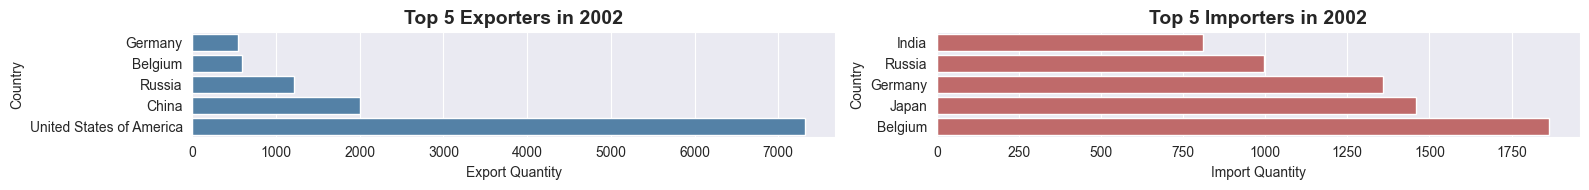

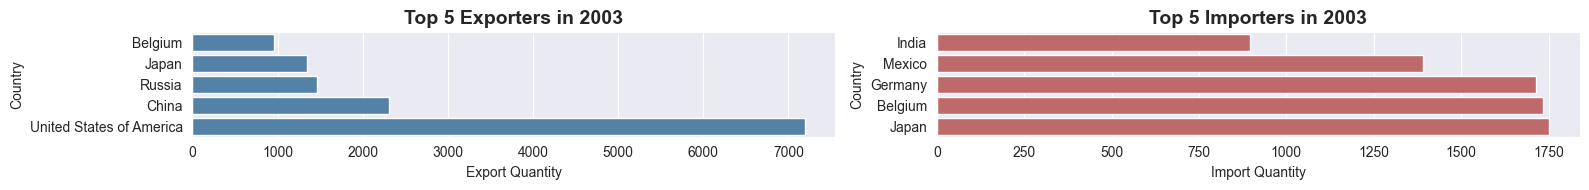

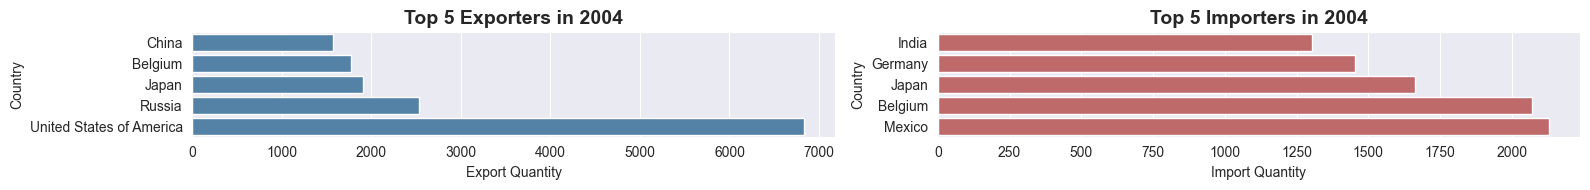

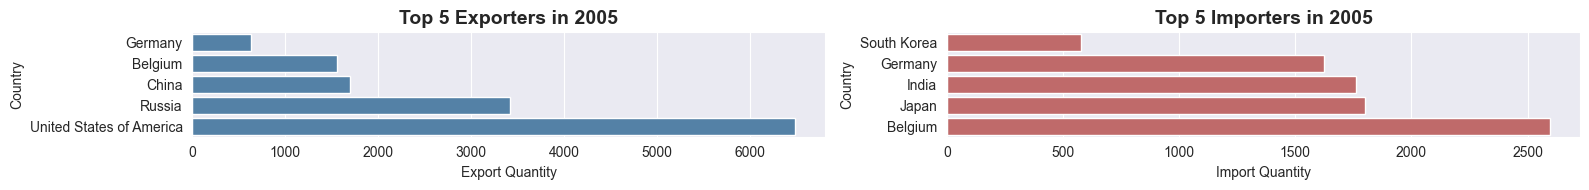

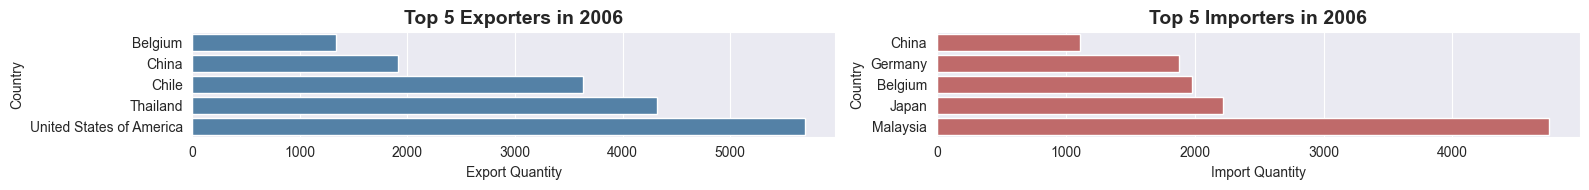

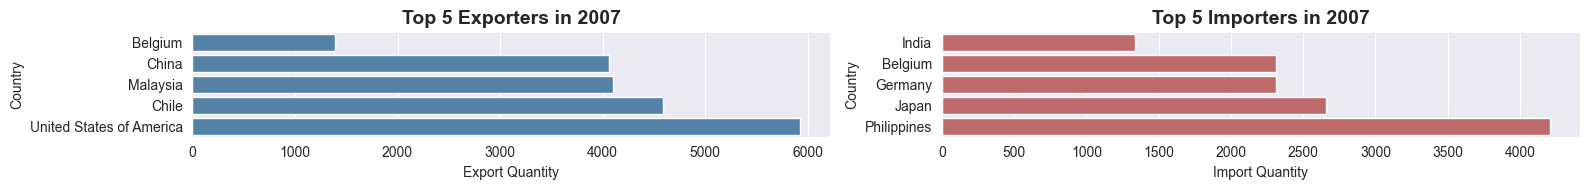

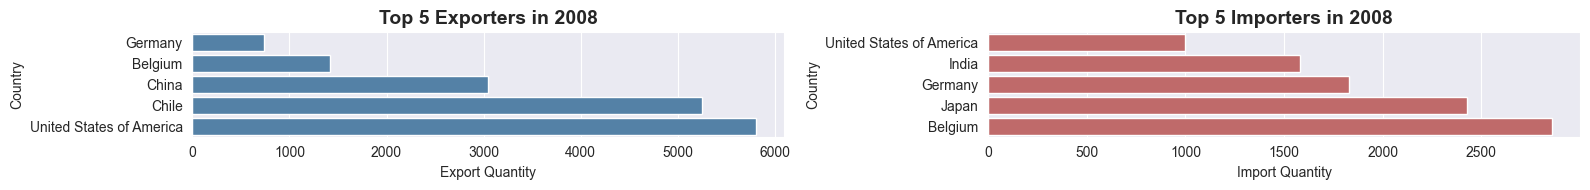

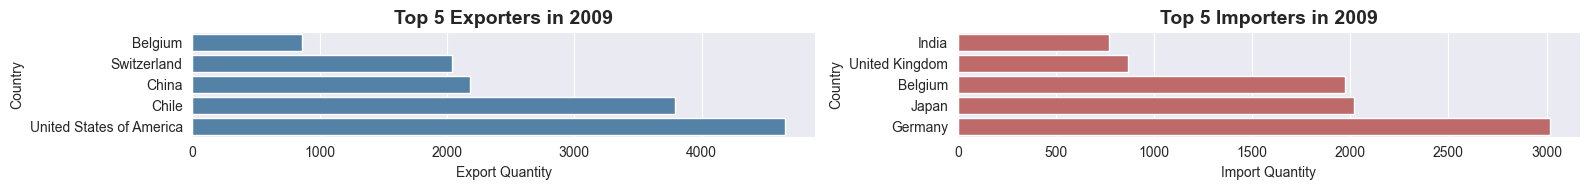

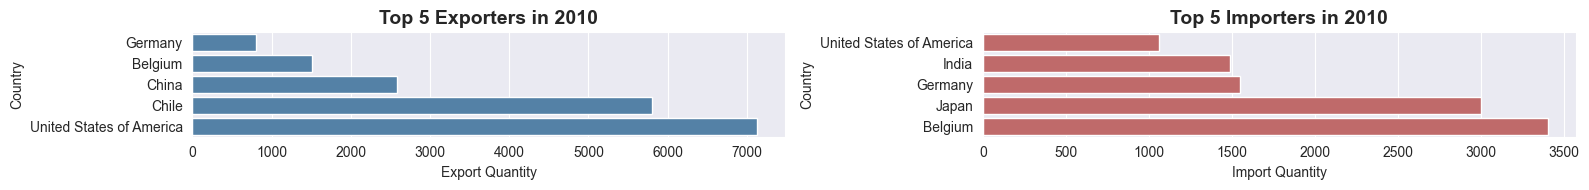

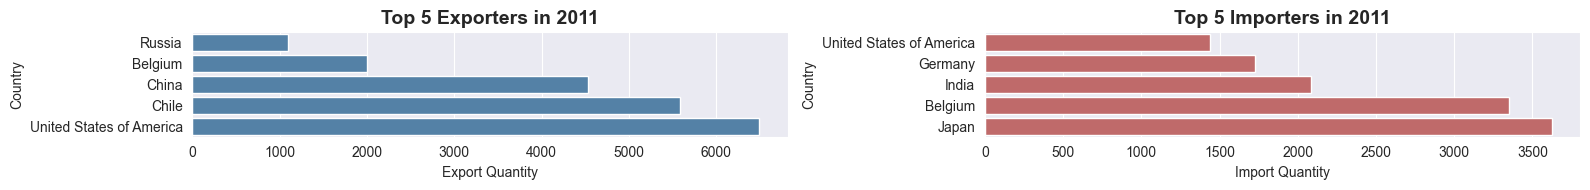

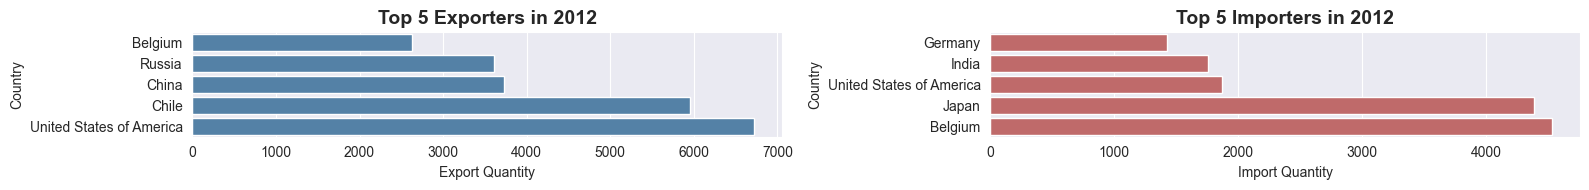

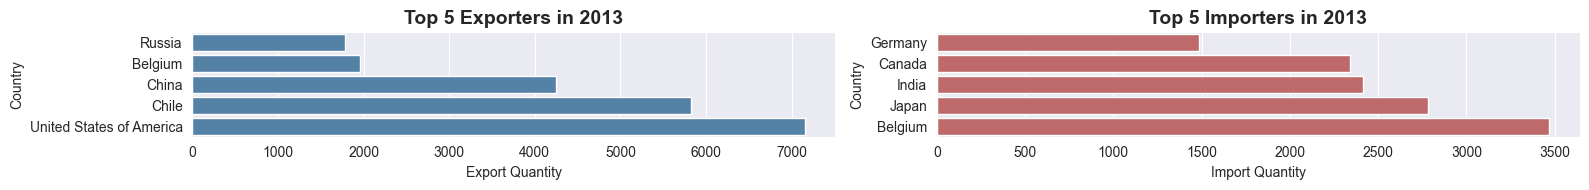

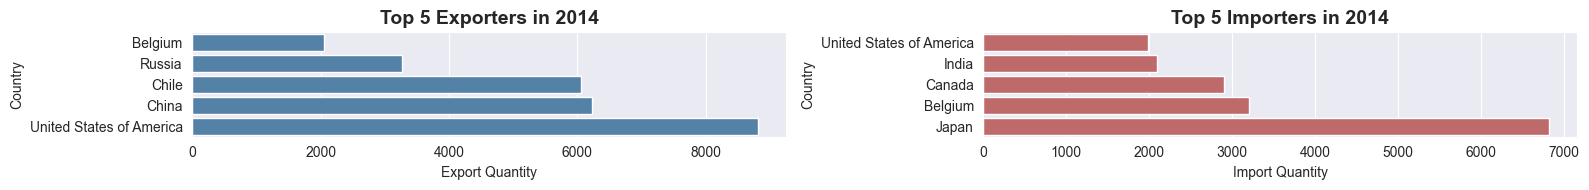

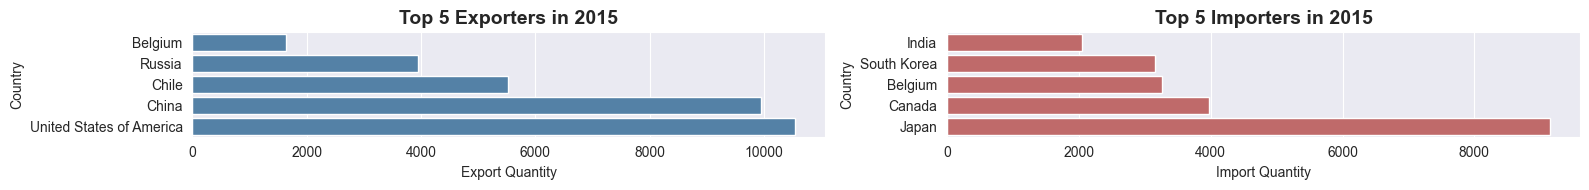

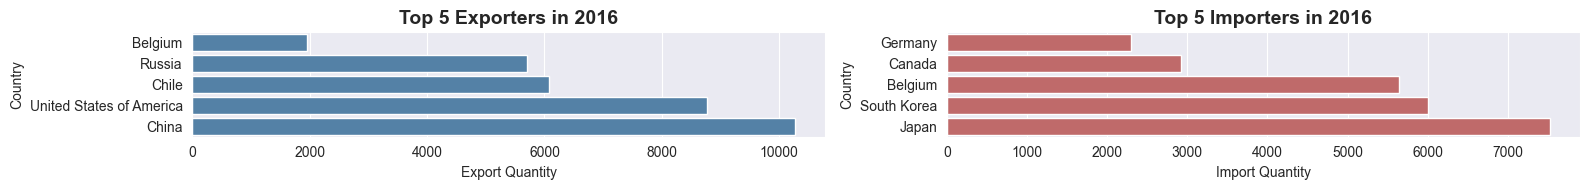

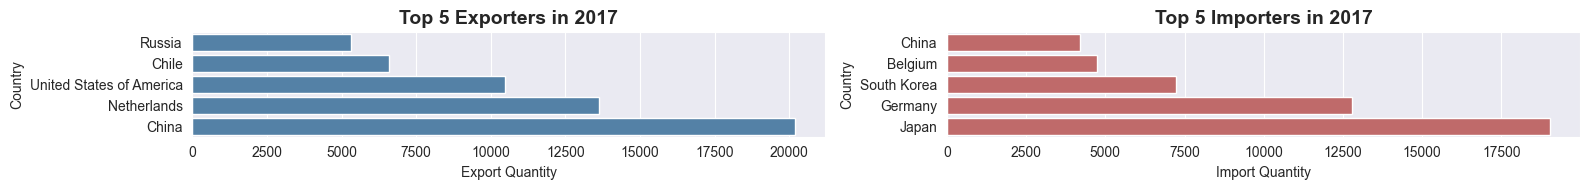

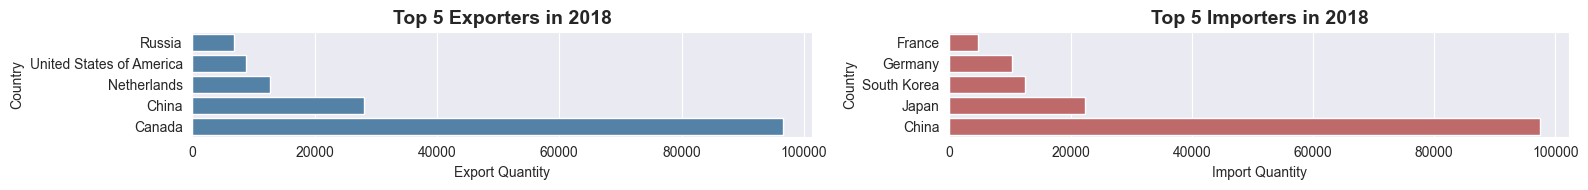

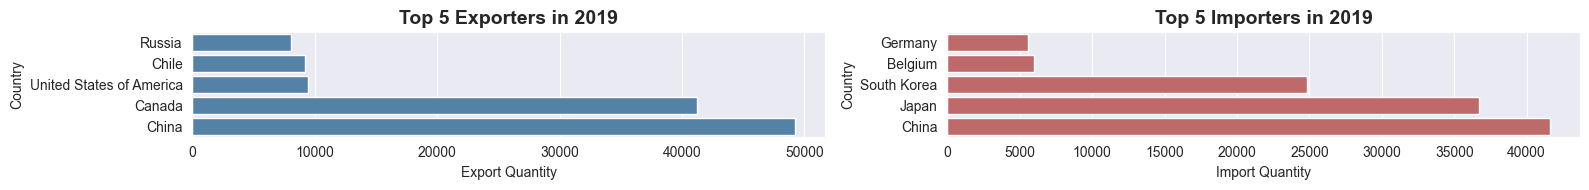

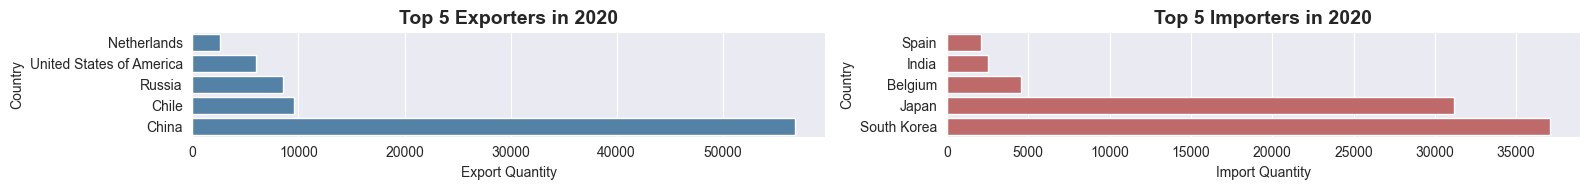

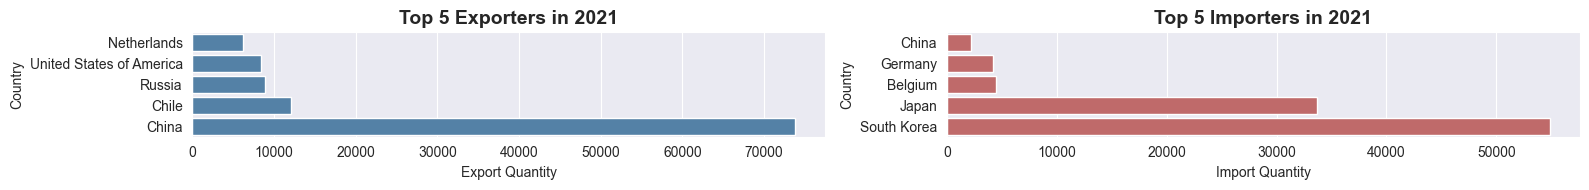

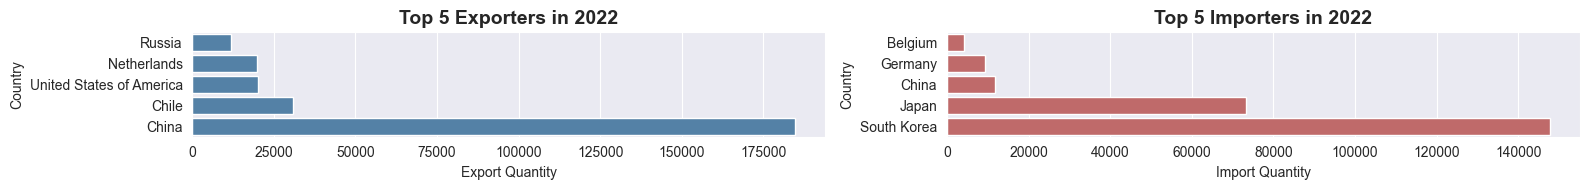

In [12]:
top_n = 5
for y in years:
    df_year = df[df['t'] == y]

    # Aggregation by Exporter
    exports = df_year.groupby("export_country")['q'].sum().reset_index()
    exports = exports.sort_values('q', ascending=False).head(top_n)

    # Aggregation by Importer
    imports = df_year.groupby("import_country")['q'].sum().reset_index()
    imports = imports.sort_values('q', ascending=False).head(top_n)

    fig, axs = plt.subplots(1, 2, figsize=(16,2))

    # Visualization of Exporters
    exports = exports.sort_values('q')
    sns.barplot(x='q', y='export_country', data=exports, ax=axs[0], color='steelblue')
    axs[0].set_title(f"Top {top_n} Exporters in {y}", fontsize=14, fontweight='bold')
    axs[0].set_xlabel("Export Quantity")
    axs[0].set_ylabel("Country")

    # Visualization of Importers
    imports = imports.sort_values('q')
    sns.barplot(x='q', y='import_country', data=imports, ax=axs[1], color='indianred')
    axs[1].set_title(f"Top {top_n} Importers in {y}", fontsize=14, fontweight='bold')
    axs[1].set_xlabel("Import Quantity")
    axs[1].set_ylabel("Country")

    plt.tight_layout()
    plt.show()


### Ranked Trading Countries

In [13]:
class HandlerLineImage(HandlerBase):
    def __init__(self, path, space=10, offset=0):
        self.space = space
        self.offset = offset
        self.image_data = plt.imread(path)
        super().__init__()

    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        line = mlines.Line2D([xdescent + self.offset, xdescent + (width - self.space) / 3. + self.offset],
                             [ydescent + height / 2., ydescent + height / 2.],
                             color=orig_handle.get_color(),
                             lw=orig_handle.get_linewidth(),
                             linestyle=orig_handle.get_linestyle())
        line.set_clip_on(False)
        line.set_transform(trans)

        bbox = Bbox.from_bounds(xdescent + (width + self.space) / 3. + self.offset,
                                ydescent,
                                height * self.image_data.shape[1] / self.image_data.shape[0],
                                height)
        t_bbox = TransformedBbox(bbox, trans)
        image = BboxImage(t_bbox)
        image.set_data(self.image_data)
        self.update_prop(image, orig_handle, legend)

        return [line, image]


def get_flag_path(country_code: str) -> str:
    return os.path.join("data/dataset", "png100px", f"{country_code.lower()}.png")


def add_flag_to_chart(ax, x, y, country_code, zoom=0.15):
    flag_path = get_flag_path(country_code)
    try:
        img = plt.imread(flag_path)
        im = OffsetImage(img, zoom=zoom)
        ab = AnnotationBbox(im, (x, y), frameon=False)
        ax.add_artist(ab)
    except FileNotFoundError:
        print(f"Flag image not found for {country_code} and path {flag_path}")


def create_bump_chart_with_flags(df, category, top_n, value_col="v", time_col="t", figsize=(14, 6), palette="tab20"):
    df_grouped = (
        df.groupby([time_col, category])[value_col]
        .sum()
        .reset_index()
        .sort_values(by=[time_col, value_col], ascending=[True, False])
    )

    df_grouped['rank'] = (
        df_grouped.groupby(time_col)[value_col]
        .rank(method='first', ascending=False)
        .astype(int)
    )

    df_top = df_grouped[df_grouped['rank'] <= top_n]
    df_pivot = df_top.pivot(index=category, columns=time_col, values='rank')
    df_pivot = df_pivot.loc[df_pivot.min(axis=1).sort_values().index]
    fig, ax = plt.subplots(figsize=figsize)
    colors = sns.color_palette(palette, len(df_pivot))

    legend_handlers = {}
    for idx, (row, color) in enumerate(zip(df_pivot.iterrows(), colors)):

        category_name = row[0]
        country_code = loader.get_country_code(category_name)

        line, = ax.plot(
            df_pivot.columns, row[1], label=category_name,
            lw=3.5, markersize=0, alpha=0.85, color=color, zorder=1
        )
        for x, y in zip(df_pivot.columns, row[1]):
            if country_code:
                add_flag_to_chart(ax, x, y, country_code, zoom=0.15)
        if country_code:
            flag_path = get_flag_path(country_code)
            legend_handlers[line] = HandlerLineImage(flag_path)
    ax.invert_yaxis()
    ax.set_xticks(df_pivot.columns)
    ax.set_yticks(range(1, top_n + 1))
    ax.set_xticklabels(df_pivot.columns, fontsize=12, rotation=45)
    ax.set_yticklabels(range(1, top_n + 1), fontsize=12)
    ax.set_title(f"Top {top_n} {category.split('_')[0].title()}ers", fontsize=18, fontweight='bold', pad=20)
    ax.set_xlabel("Year", fontsize=14, labelpad=15)
    ax.set_ylabel("Rank", fontsize=14, labelpad=15)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    legend = ax.legend(
        loc='lower center',
        bbox_to_anchor=(0.5, -0.5),
        title=" ".join(category.split("_")).title(),
        fontsize=10,
        title_fontsize=12,
        handler_map=legend_handlers,
        ncol=8
    )
    plt.subplots_adjust(bottom=0.5)
    plt.tight_layout()
    output_file = os.path.join(export_path, f"{hs_label}_bump_chart_{category}_{top_n}.png")
    plt.savefig(output_file, dpi=300, bbox_inches='tight', bbox_extra_artists=[legend])
    plt.show()


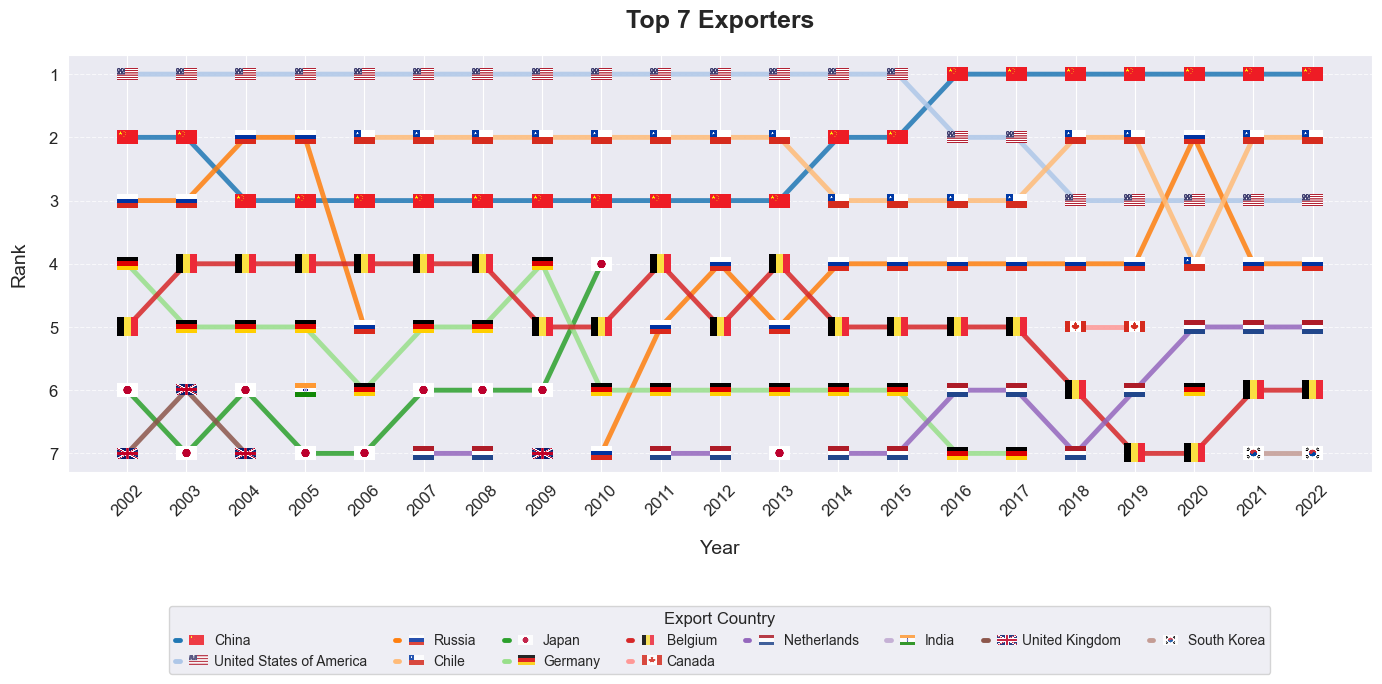

In [14]:
create_bump_chart_with_flags(
    df=df,
    category='export_country',
    top_n=7,
)

### Top Importers

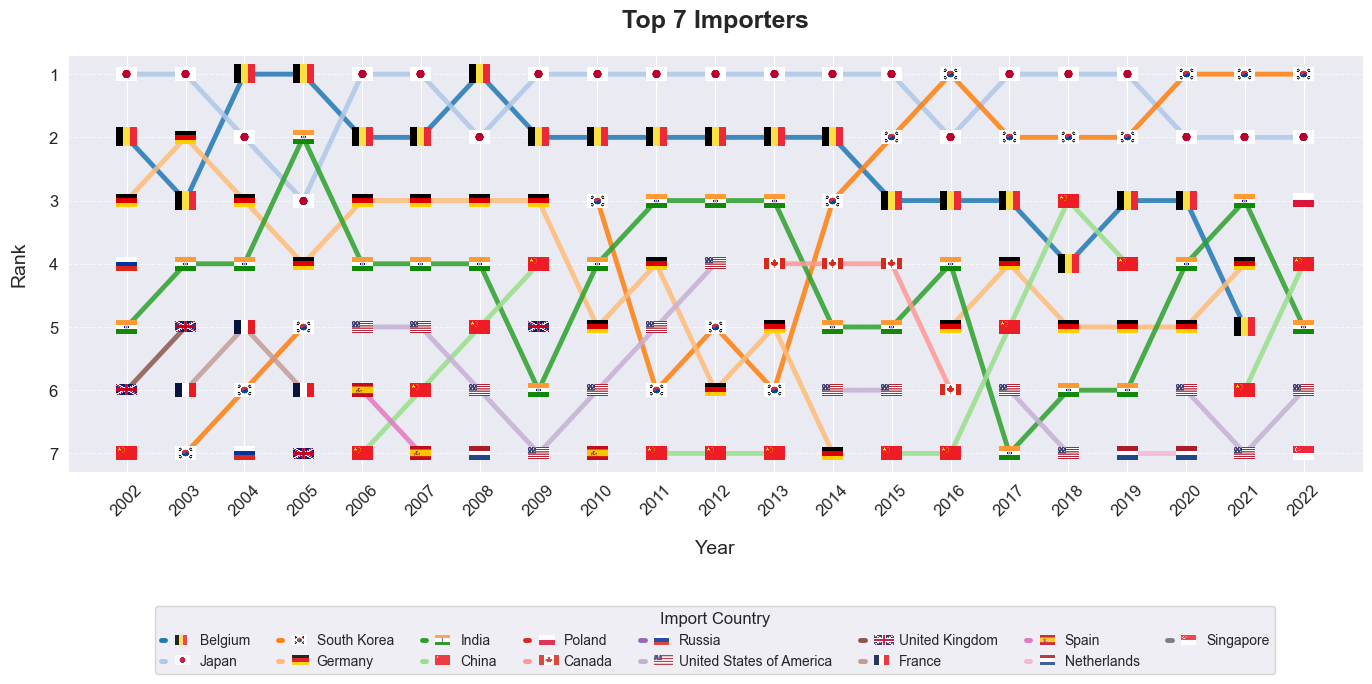

In [15]:
create_bump_chart_with_flags(
    df=df,
    category='import_country',
    top_n=7,
)

### Map Visualizations

In [16]:
gray_blue_cmap = mcolors.LinearSegmentedColormap.from_list(
    "gray_blue",
    ["gray", "blue"]
)

gray_red_cmap = mcolors.LinearSegmentedColormap.from_list(
    "gray_red",
    ["gray", "red"]
)

Unmapped Names: Curaçao, Singapore, Andorra, Cook Isds, Barbados
Unmapped Names: Côte d'Ivoire, Maldives, Kiribati, Andorra, Cabo Verde, Montserrat, Br. Virgin Isds, Samoa, Lao People's Dem. Rep., Bermuda, Singapore, Comoros, Bahrain, Palau, Cayman Isds, Barbados, Seychelles


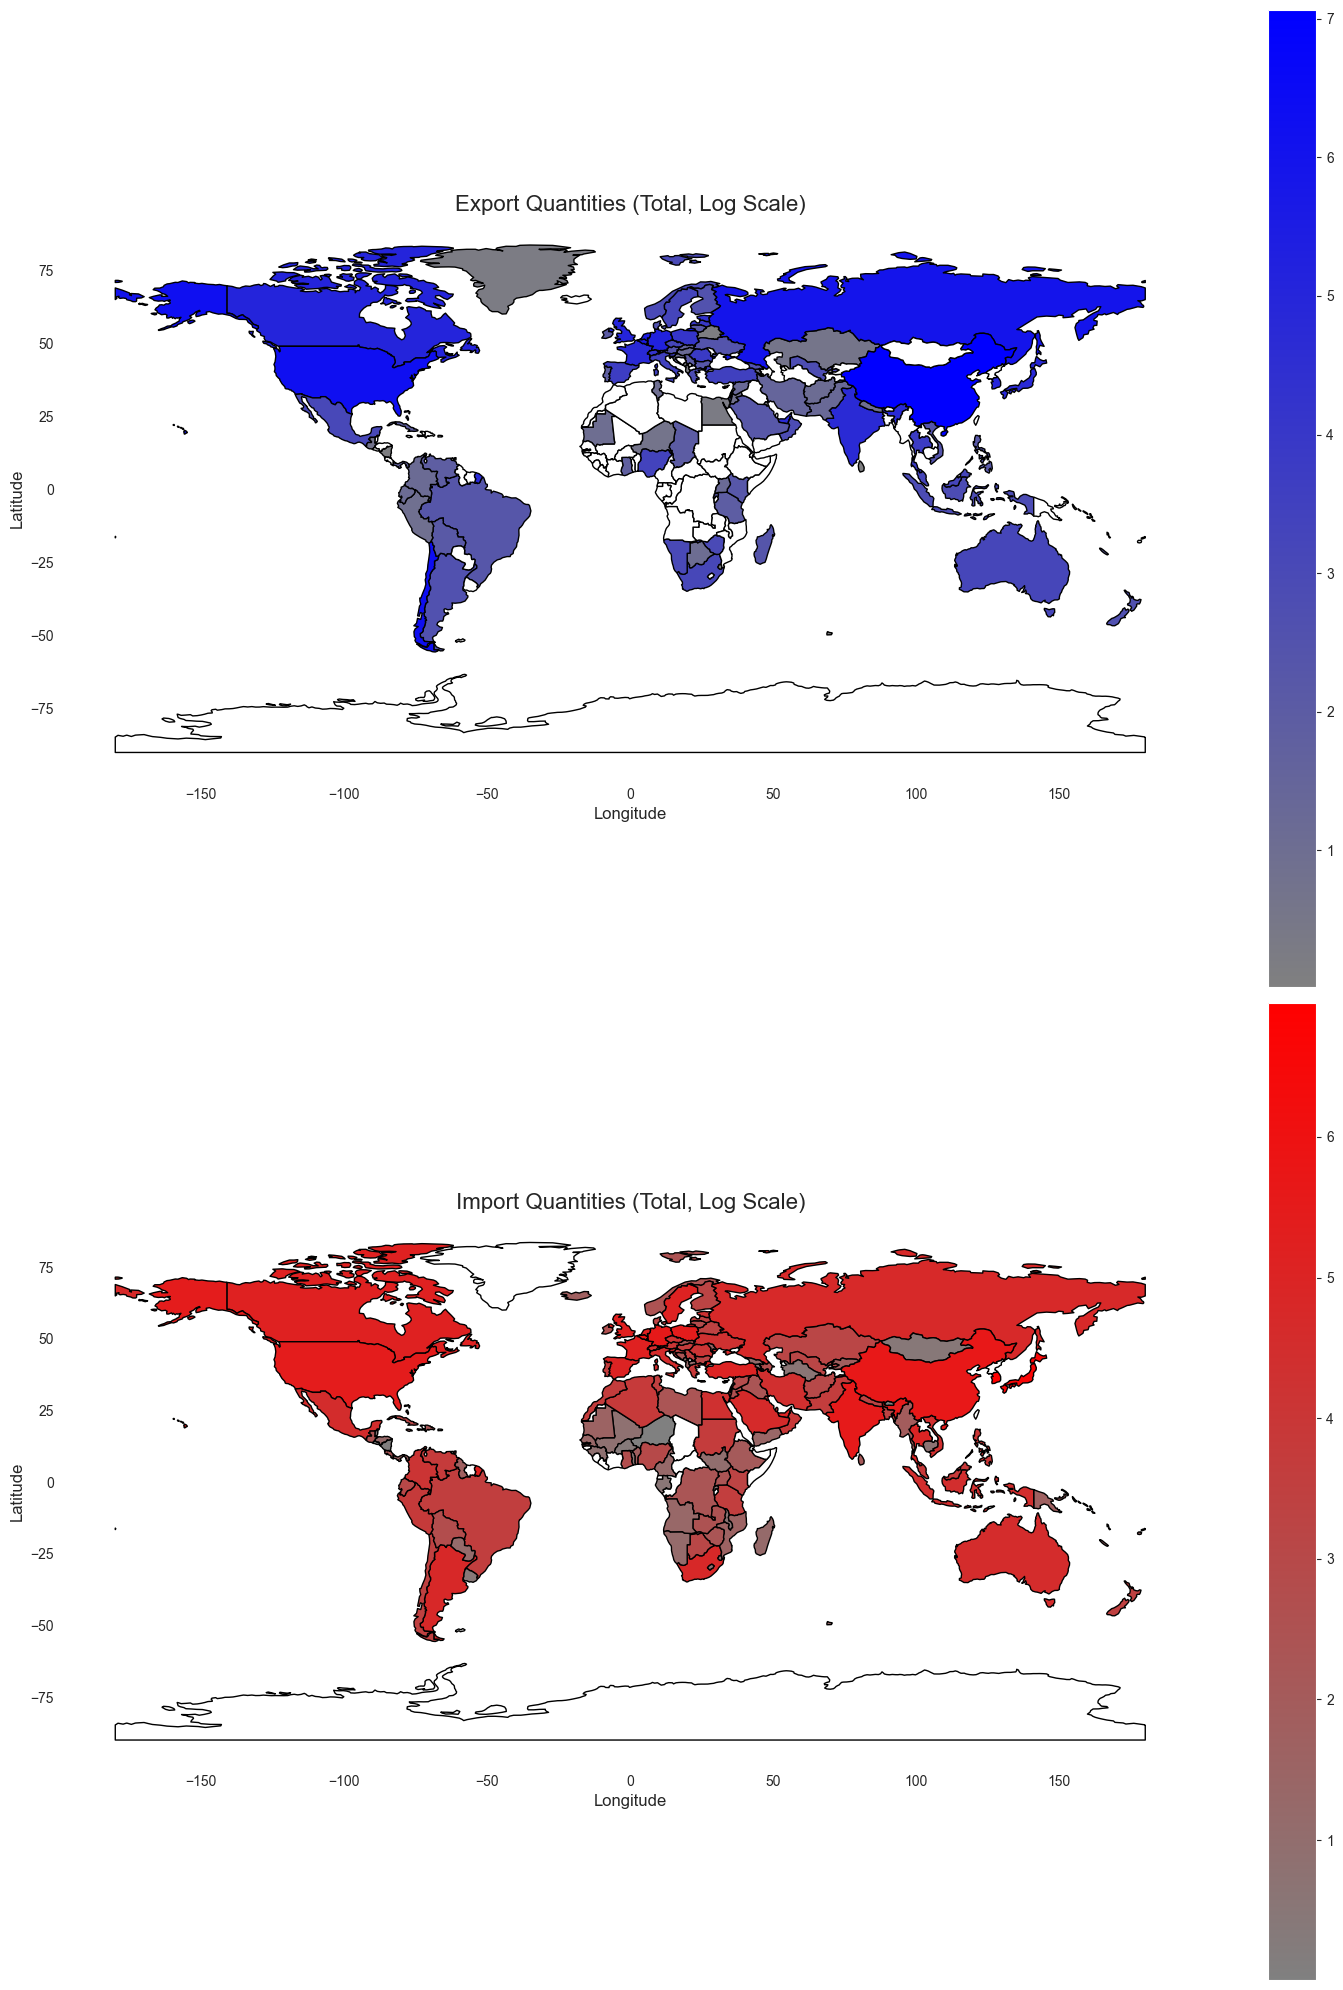

In [17]:
def plot_map():
    world_export, world_import = loader.preprocess_culture_and_country_names(df)

    world_export["v"] = np.log10(world_export["v"] + 1)
    world_import["v"] = np.log10(world_import["v"] + 1)

    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 20))
    fig.patch.set_facecolor('white')
    for a in ax:
        a.set_facecolor('white')

    world_export.plot(
        column="v",
        cmap=gray_blue_cmap,
        legend=True,
        ax=ax[0],
        missing_kwds={"color": "white"},
        edgecolor="black"
    )
    ax[0].set_title(f"Export Quantities (Total, Log Scale)", fontsize=16)
    ax[0].set_xlabel("Longitude", fontsize=12)
    ax[0].set_ylabel("Latitude", fontsize=12)

    world_import.plot(
        column="v",
        cmap=gray_red_cmap,
        legend=True,
        ax=ax[1],
        missing_kwds={"color": "white"},
        edgecolor="black"
    )
    ax[1].set_title(f"Import Quantities (Total, Log Scale)", fontsize=16)
    ax[1].set_xlabel("Longitude", fontsize=12)
    ax[1].set_ylabel("Latitude", fontsize=12)

    plt.tight_layout()
    plt.savefig(os.path.join(export_path, f"{hs_label}_net_export_map_vertical.png"), dpi=300, facecolor='white')
    plt.show()

plot_map()


Unmapped Names: Curaçao, Singapore, Andorra, Cook Isds, Barbados
Unmapped Names: Côte d'Ivoire, Maldives, Kiribati, Andorra, Cabo Verde, Montserrat, Br. Virgin Isds, Samoa, Lao People's Dem. Rep., Bermuda, Singapore, Comoros, Bahrain, Palau, Cayman Isds, Barbados, Seychelles


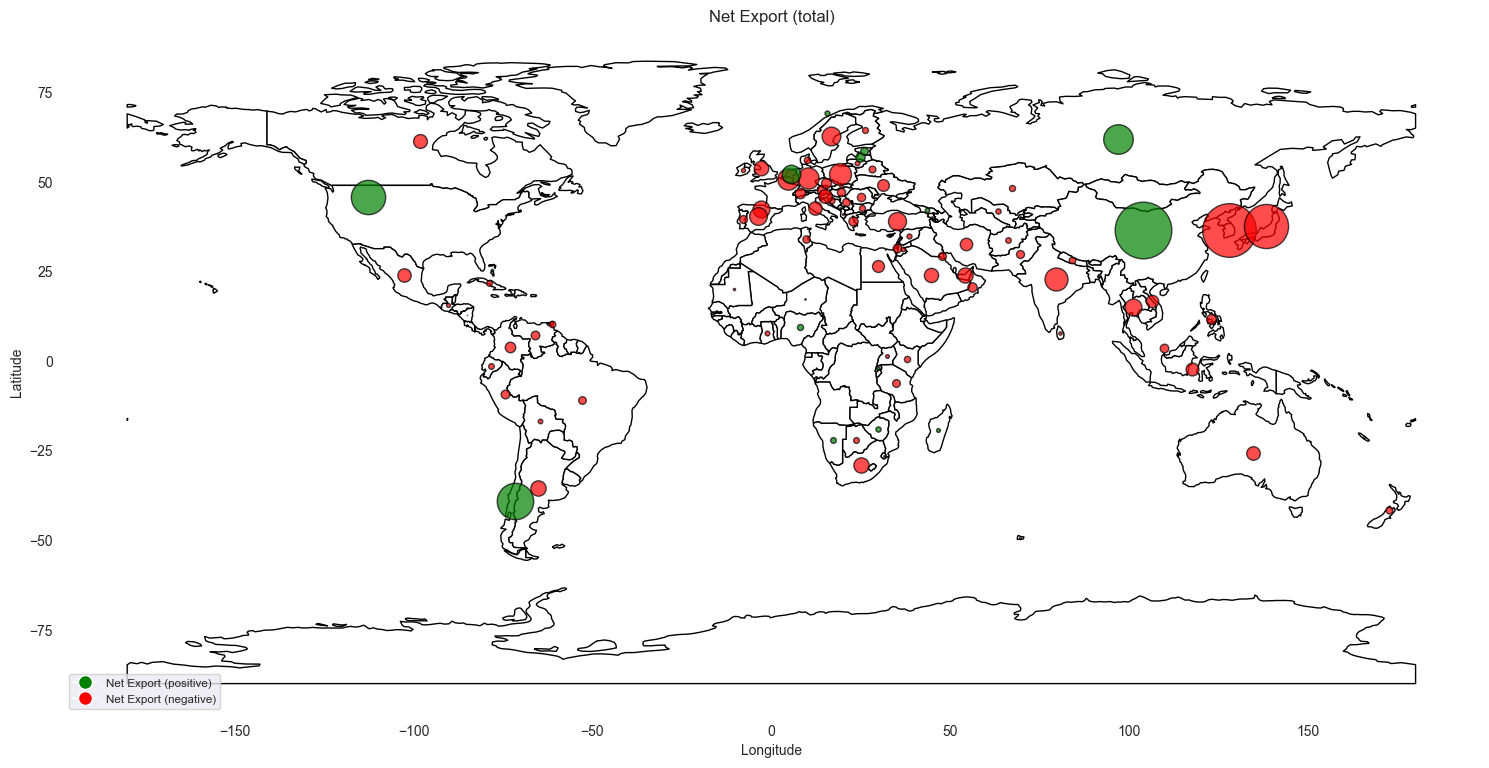

In [18]:
def plot_map_2():
    shapefile_path = os.path.join("data/dataset", "110m_cultural", "ne_110m_admin_0_countries.shp")
    world = gpd.read_file(shapefile_path)
    world_export, world_import = loader.preprocess_culture_and_country_names(df)

    net_export = (
        world_export.set_index("export_country")["v"]
        - world_import.set_index("import_country")["v"]
    ).reset_index()
    net_export.columns = ["country", "net_export"]

    world_net = world.merge(net_export, left_on="ADMIN", right_on="country", how="left")

    fig, ax = plt.subplots(1, 1, figsize=(15, 10))

    world.plot(ax=ax, color="white", edgecolor="black")
    ax.set_facecolor('none')

    for _, row in world_net.iterrows():
        if pd.notnull(row["net_export"]) and row["net_export"] != 0:
            size = np.sqrt(abs(row["net_export"])) / 2
            color = "green" if row["net_export"] > 0 else "red"
            ax.scatter(
                row.geometry.centroid.x,
                row.geometry.centroid.y,
                s=size,
                color=color,
                alpha=0.7,
                edgecolor="black"
            )

    handles = [
        plt.Line2D([0], [0], marker="o", color="w", markerfacecolor="green", markersize=10, label="Net Export (positive)"),
        plt.Line2D([0], [0], marker="o", color="w", markerfacecolor="red", markersize=10, label="Net Export (negative)"),
    ]
    ax.legend(handles=handles, loc="lower left", fontsize="small")

    ax.set_title(f"Net Export (total)")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

    plt.tight_layout()
    plt.savefig(os.path.join(export_path, f"{hs_label}_net_export_map_2.png"), dpi=300, transparent=True)
    plt.show()

plot_map_2()


Unmapped Names: Curaçao, Singapore, Andorra, Cook Isds, Barbados
Unmapped Names: Côte d'Ivoire, Maldives, Kiribati, Andorra, Cabo Verde, Montserrat, Br. Virgin Isds, Samoa, Lao People's Dem. Rep., Bermuda, Singapore, Comoros, Bahrain, Palau, Cayman Isds, Barbados, Seychelles


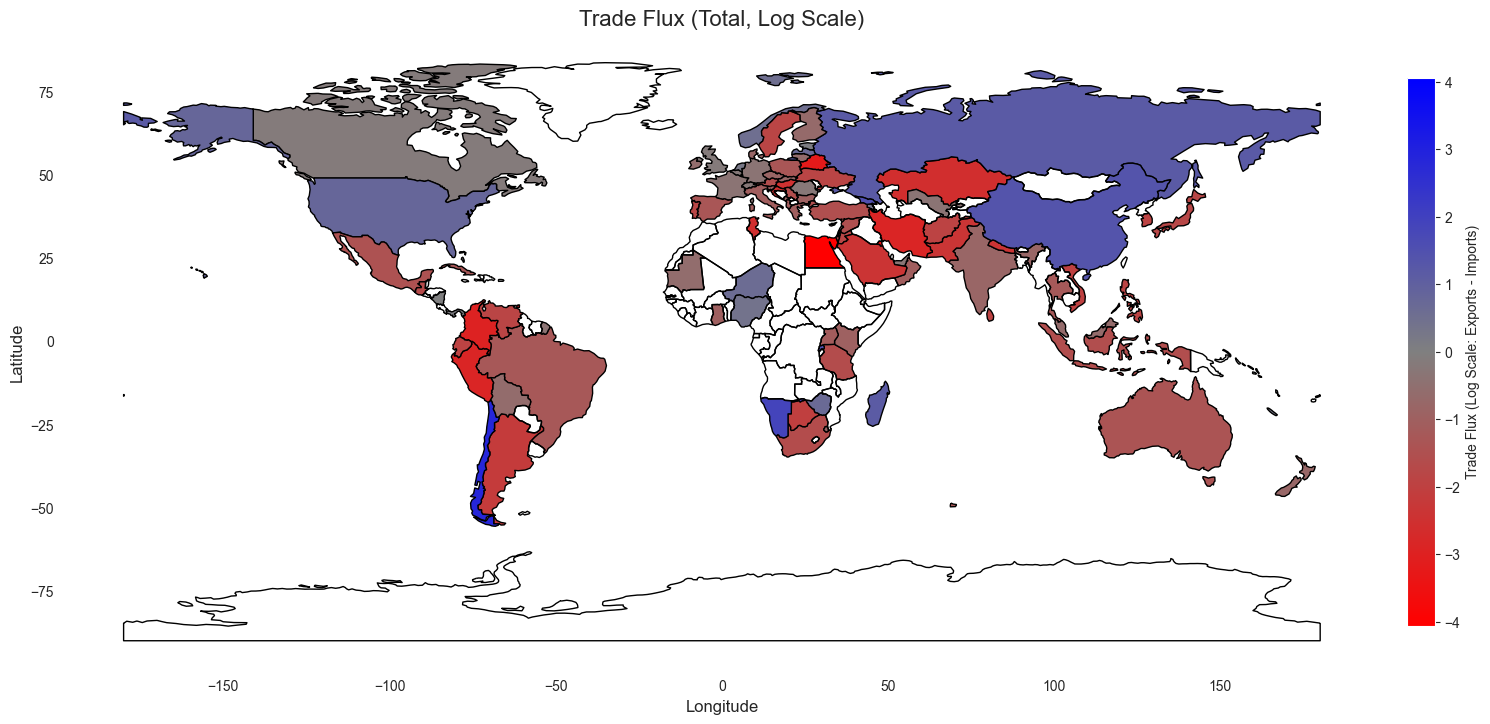

In [19]:
def plot_flux():
    world_export, world_import = loader.preprocess_culture_and_country_names(df)

    world_export["v"] = np.log10(world_export["v"] + 1)
    world_import["v"] = np.log10(world_import["v"] + 1)

    world_flux = world_export[["ADMIN", "geometry", "v"]].merge(
        world_import[["ADMIN", "v"]], on="ADMIN", suffixes=("_exp", "_imp")
    )
    world_flux["flux"] = world_flux["v_exp"] - world_flux["v_imp"]

    vmax = world_flux["flux"].abs().max()

    flux_cmap = mcolors.LinearSegmentedColormap.from_list("flux_cmap", ["red", "gray", "blue"])
    norm = mcolors.Normalize(vmin=-vmax, vmax=vmax)

    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    fig.patch.set_alpha(0)
    ax.set_facecolor((0, 0, 0, 0))

    world_flux.plot(
        column="flux",
        cmap=flux_cmap,
        norm=norm,
        legend=False,
        ax=ax,
        missing_kwds={"color": "none"},
        edgecolor="black"
    )

    sm = plt.cm.ScalarMappable(norm=norm, cmap=flux_cmap)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, orientation="vertical", fraction=0.02, pad=0.02)
    cbar.set_label("Trade Flux (Log Scale: Exports - Imports)")

    ax.set_title(f"Trade Flux (Total, Log Scale)", fontsize=16)
    ax.set_xlabel("Longitude", fontsize=12)
    ax.set_ylabel("Latitude", fontsize=12)

    plt.tight_layout()
    plt.savefig(
        os.path.join(export_path, f"{hs_label}_trade_flux_map.png"),
        dpi=300,
        transparent=True
    )
    plt.show()

plot_flux()
